In [1]:
from PIL import Image, ImageDraw, ImageFont
import numpy as np
import yaml
import rstr
import logging
import random
import os
import time

In [2]:
def draw_rectangle(draw, centre, size, roundness, colour):
    img = draw.im
    centre_abs = np.array([img.size[0] * centre[0], img.size[1] * centre[1]])
    size_abs = np.array([img.size[0] * size[0], img.size[1] * size[1]])/2
    corners = list((centre_abs - size_abs).astype(int)) + list((centre_abs + size_abs).astype(int))
    roundness_abs = round(max(size_abs) * roundness / 100)
    
    draw.rounded_rectangle(corners,
                            radius=roundness_abs,
                            fill=colour,
                            width=0)

In [3]:
def draw_concenctric_rectangles(draw, centre, base_size, roundness, rects):
    img = draw.im
    for rect in rects:
        border = (1 - rect[0]) * (img.size[0] * base_size[0])
        draw_rectangle(draw,
                       centre,
                       [rect[0] * base_size[0], base_size[1] - border/img.size[1]],
                       roundness,
                       rect[1])

In [4]:
def draw_text(draw, text, centre, height, font_path, colour, font_size100=None):
    if not text:
        return
    
    if font_size100 is None:
        font_size100 = ImageFont.truetype(font_path, 100).getsize(text)
    
    img = draw.im
    centre_abs = [img.size[0] * centre[0], img.size[1] * centre[1]]
    font_size = round(100 * height * img.size[1] / font_size100[1])
    text_size = ImageFont.truetype(font_path, font_size).getsize(text)
    anchor_point = np.array(centre_abs) - np.array(text_size)/2
    
    font = ImageFont.truetype(font_path, font_size)
    
    draw.text((centre_abs[0] - text_size[0]/2, centre_abs[1] - text_size[1]/2), text, fill=colour, font=font)

In [100]:
def stamp_image(img, centre, size, image_path=None, im=None):
    if im is None and image_path is None:
        return
    
    if im is None and image_path is not None:
        im = Image.open(image_path)
        
    size_abs = [round(size[0] * img.size[0]), round(size[1] * img.size[1])]
    
    print(im.size, size)
    print(size_abs)
    im = im.resize(size_abs)
    print(im.size)
    print()
    
    half_size = (np.array(im.size)/2).astype(int)
    corner = (np.array(centre) * img.size - half_size).astype(int)
    
    mask = None
    if 'A' in im.getbands():
        mask = im
    img.paste(im, np.array(im.getbbox()).astype(int) + list(corner) * 2, mask=mask)

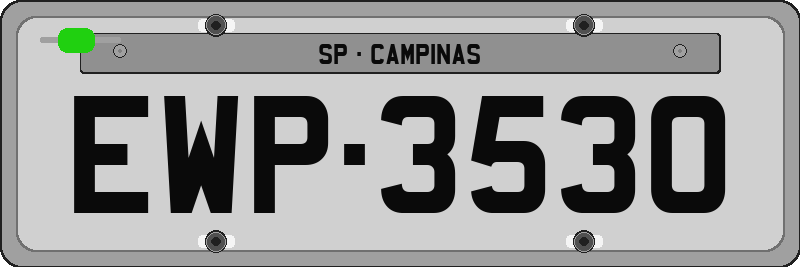

In [6]:
scale = 1
plate_prop = 1/3
width = 800
text_prop = 0.88
plate_size = [round(width * scale), round(width * plate_prop * scale)]
text_anchor_height = 1/6 * plate_size[1]
font_sample = 'AAA·0000'


font_path = '../data/raw/fonts/mandatory.ttf'
text = 'EWP·3530'
text2 = 'SP · CAMPINAS'
holes = np.array([[0.27, 0.095], [0.045, 0.045]])
corners = np.array([[0, 0], [1, 0], [1, 1], [0, 1]])
screws = [
            (1, '#202020'),
            (0.9, '#A0A0A0'),
            (0.8, '#505050'),
            (0.4, '#202020')
        ]
screw_size_p = 0.08
screw_size = [screw_size_p*plate_prop, screw_size_p]
rivets = [
            (1, '#202020'),
            (0.8, '#A0A0A0'),
            (0.2, '#808080')
        ]
rivets_size_p = 0.05
rivets_size = [rivets_size_p*plate_prop, rivets_size_p]
borders = [
            (1, '#202020'),
            (0.995, '#A0A0A0'),
            (0.96, '#707070'),
            (0.955, '#D0D0D0')
        ]
city_borders = [
            (1, '#202020'),
            (0.995, '#909090')
        ]

font_size100 = ImageFont.truetype(font_path, 100).getsize(font_sample)
font_size = round(100 * (width * text_prop) / font_size100[0])

img = Image.new('RGB', plate_size, color='#FFFFFF')
font = ImageFont.truetype(font_path, font_size)

draw = ImageDraw.Draw(img)
acc_t = 0

draw_concenctric_rectangles(draw, [0.5, 0.5], [1, 1], 5, borders)
draw_text(draw, text, [0.5, 0.5], 0.6, font_path, (10, 10, 10))
draw_concenctric_rectangles(draw, [0.5, 0.2], [0.8, 0.15], 1, city_borders)
draw_text(draw, text2, [0.5, 0.19], 0.10, font_path, (10, 10, 10))
draw_concenctric_rectangles(draw, [0.15, 0.19], rivets_size, 200, rivets)
draw_concenctric_rectangles(draw, [0.85, 0.19], rivets_size, 200, rivets)
draw_rectangle(draw, [0.1, 0.15], [0.1, 0.02], 5, '#A0A0A0')
draw_rectangle(draw, [0.095, 0.15], [0.045, 0.09], 50, '#20D010')
for corner in corners:
    draw_rectangle(draw, corner + holes[0]*(1-2*corner), holes[1], 20, '#F5F5F5')
    draw_concenctric_rectangles(draw, corner + holes[0]*(1-2*corner), screw_size, 200, screws)

img

(839, 563) [0.075, 0.18]
[60, 43]
(60, 43)

(640, 448) [0.075, 0.18]
[60, 43]
(60, 43)



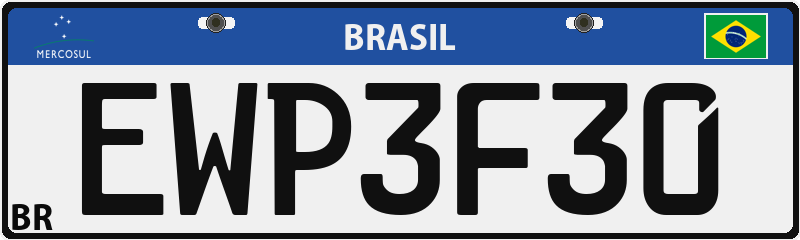

In [111]:
scale = 1
plate_prop = 0.3
width = 800
text_prop = 0.88
plate_size = [round(width * scale), round(width * plate_prop * scale)]
text_anchor_height = 1/6 * plate_size[1]
font_sample = 'AAA0A00'


font_path = '../data/raw/fonts/fe-schrift.ttf'
font_path2 = '../data/raw/fonts/country_name2.otf'
text = 'EWP3F30'
text2 = 'BRASIL'
text3 = 'BR'

holes = np.array([[0.27, 0.095], [0.045, 0.045]])
corners = np.array([[0, 0], [1, 0]])
screws = [
            (1, '#202020'),
            (0.9, '#A0A0A0'),
            (0.8, '#505050'),
            (0.4, '#303020')
        ]
screw_size_p = 0.08
screw_size = [screw_size_p*plate_prop, screw_size_p]
borders = [
            (1, '#F0F0F0'),
            (0.995, '#101010'),
            (0.98, '#F0F0F0')
        ]
font_size100 = ImageFont.truetype(font_path, 100).getsize(font_sample)
font_size = round(100 * (width * text_prop) / font_size100[0])

img = Image.new('RGB', plate_size, color='#FFFFFF')
font = ImageFont.truetype(font_path, font_size)

draw = ImageDraw.Draw(img)
acc_t = 0

draw_concenctric_rectangles(draw, [0.5, 0.5], [1, 1], 2, borders)
draw_text(draw, text, [0.5, 0.6], 0.6, font_path, '#101010')
draw_rectangle(draw, [0.5, 0.1], [0.98, 0.13], 2, '#2050A0')
draw_rectangle(draw, [0.5, 0.19], [0.98, 0.16], 0, '#2050A0')
draw_text(draw, text2, [0.5, 0.15], 0.12, font_path2, (240, 240, 240))
draw_text(draw, text3, [0.04, 0.9], 0.12, font_path2, (10, 10, 10))
for corner in corners:
    draw_rectangle(draw, corner + holes[0]*(1-2*corner), holes[1], 20, '#F5F5F5')
    draw_concenctric_rectangles(draw, corner + holes[0]*(1-2*corner), screw_size, 200, screws)
    
stamp_image(img, [0.08, 0.15], [0.075, 0.18], '../data/raw/images/Flag_of_Mercosul.png')
draw_rectangle(draw, [0.92, 0.15], [0.079, 0.19], 0, '#F0F0F0')
stamp_image(img, [0.92, 0.15], [0.075, 0.18], '../data/raw/images/Flag_of_Brazil.png')

img

In [8]:
borders

[(1, '#F0F0F0'), (0.995, '#101010'), (0.98, '#F0F0F0')]

In [9]:
def random_pick(rtype, options):
    if rtype == 'random.params':
        return None
    options = options.copy()
    params = options.pop('params')
    if rtype == 'random.linear':
        delta = params[1] - params[0]
        pick = random.random() * delta + params[0]
        for name, option in options.items():
            option = option.copy()
            val = option.pop('random.params', params[1])
            if val > pick:
                return get_values(option)
    
    logging.warning(f'No value picked for {rtype}')
    return (None, None)

In [10]:
def replace_value(value, value_keys):
    if type(value) is dict:
        return get_values(value, value_keys)[0]
    elif type(value) is list:
        return [replace_value(v, value_keys) for v in value]
    elif type(value) is not str:
        return value
    if value.startswith('reg:'):
        return rstr.xeger(value[len('reg:'):])
    elif value.startswith('$'):
        target = value[1:]
        return value_keys.get(target, value)
    else:
        return value

In [11]:
def get_values(val_dict, value_keys={}):
    result = {}
    value_keys = value_keys.copy()
    for key, value in val_dict.items():
        if key == 'vars':
            for v in value:
                new_keys, old_keys = get_values(v, value_keys)
                if new_keys:
                    value_keys.update(new_keys)
                if old_keys:
                    value_keys.update(old_keys)
        elif str(key).startswith('random.'):
            value, vk = random_pick(key, value)
            if value:
                result.update(value)
            if vk:
                value_keys.update(vk)
        elif type(value) is str:
            result[key] = replace_value(value, value_keys)
        elif type(value) is list:
            result[key] = [replace_value(v, value_keys) for v in value]
        elif type(value) is dict:
            values, vks = get_values(value, value_keys)
            result[key] = values
            if vks:
                value_keys.update(vks)
        else:
            result[key] = value
                    
    return result, value_keys

In [39]:
def build_from_descriptor(description):
    img = Image.new('RGBA', description['size'], color='#FFFFFF00')
    draw = ImageDraw.Draw(img)
    
    for component in description['components']:
        comp_name = list(component.keys())[0]
        content = component[comp_name]
        if comp_name == 'concenctric_rectangles':
            draw_concenctric_rectangles(draw,
                                        content['center'],
                                        content['size'],
                                        content['roundness'],
                                        [list(d.items())[0] for d in content['components']])
        elif comp_name == 'text':
            draw_text(draw,
                      content['content'],
                      content['center'],
                      content['size'],
                      content['font'],
                      content['color'])
        elif comp_name == 'rectangle':
            draw_rectangle(draw,
                           content['center'],
                           content['size'],
                           content['roundness'],
                           content['color'])
        elif comp_name == 'image':
            stamp_image(img,
                        content['center'],
                        content['size'],
                        content['path'])

    return img

In [13]:
def gen_plates(descriptor_path):
    with open(descriptor_path, encoding='utf8') as f:
        desc = yaml.load(f, Loader=yaml.FullLoader)
    
    generated = set()
    config = desc['config']
    repeat = config.get('allow_repeat', False)
    total = config.get('generate_n', 1)
    output_dir = config.get('output_dir', '.')
    
    for i in range(total):
        licence = None
        while not licence or licence in generated:
            plate_desc, keys = get_values(desc['plates'])
            licence = keys['licence_number']
        img = build_from_descriptor(plate_desc)
        img.save(os.path.join(output_dir, f'{int(time.time())}_{licence}.png'))

In [14]:
with open('../data/interim/plate_gen.yaml', encoding='utf8') as f:
        desc = yaml.load(f, Loader=yaml.FullLoader)

(839, 563)
[60, 60]
(60, 40)
(60, 60)

(1920, 1056)
[60, 60]
(60, 33)
(60, 60)



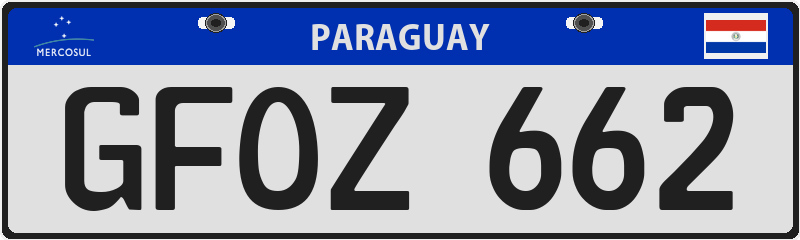

In [81]:
plate = build_from_descriptor(get_values(desc['plates'])[0])
plate

(480, 144) [0.5, 0.18]
[900, 144]
(900, 144)



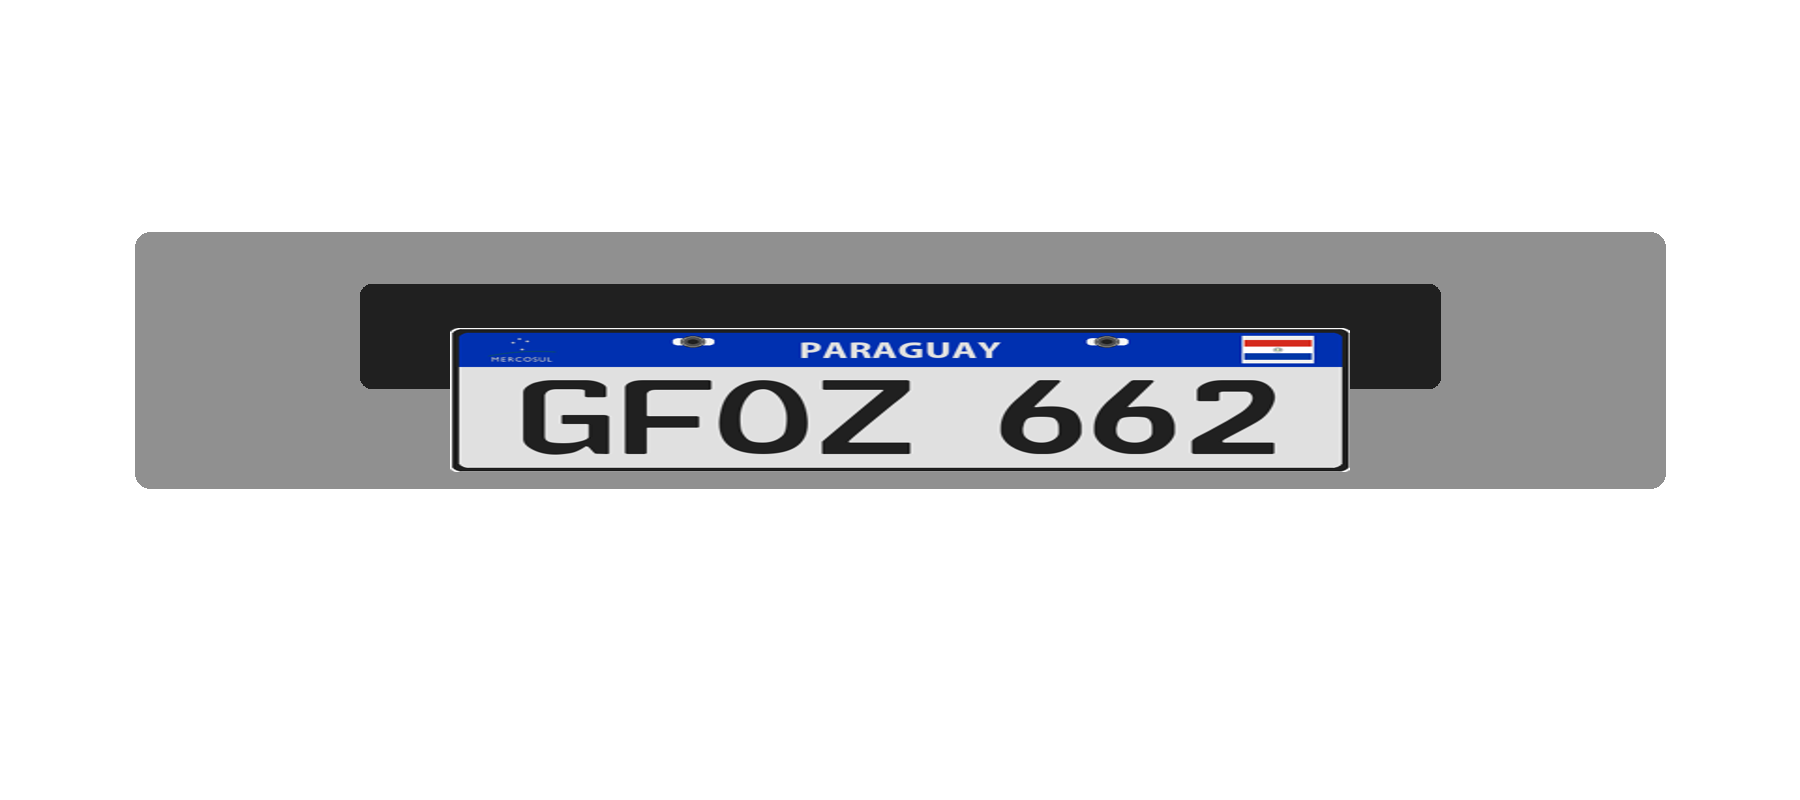

In [110]:
width = 800
text_prop = 0.88
plate_size = [1800, 800]
plate_prop = plate_size[1] / plate_size[0]


img = Image.new('RGB', plate_size, color='#FFFFFF')

draw = ImageDraw.Draw(img)
acc_t = 0

draw_rectangle(draw, [0.5, 0.45], [0.85, 0.32], 2, '#909090')
draw_rectangle(draw, [0.5, 0.42], [0.6, 0.13], 2, '#202020')
    
stamp_image(img, [0.5, 0.5], [0.5, 0.18], im=plate)

img